### Importing necessary packages and modules

In [82]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2]:
# Loading the dataset

df = pd.read_csv('C:/Users/indraneel.b/Documents/PGD_IIIT_Bangalore/Lead Scoring Assignment/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Check for no. of rows and columns

df.shape

(9240, 37)

In [5]:
# Statistical Data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation and Cleaning

In [13]:
# Checking the missing values

(df.isnull().sum()/df.shape[1])*100

Prospect ID                                         0.000000
Lead Number                                         0.000000
Lead Origin                                         0.000000
Lead Source                                       116.129032
Do Not Email                                        0.000000
Do Not Call                                         0.000000
Converted                                           0.000000
TotalVisits                                       441.935484
Total Time Spent on Website                         0.000000
Page Views Per Visit                              441.935484
Last Activity                                     332.258065
Country                                          7938.709677
Specialization                                   4638.709677
How did you hear about X Education               7119.354839
What is your current occupation                  8677.419355
What matters most to you in choosing a course    8738.709677
Search                  

In [14]:
# Dropping columns which has missing values above 3000

for col in df:
    if df[col].isnull().sum()> 3000:
        df.drop(col, 1, inplace = True)

In [15]:
df.drop(['City','Country'], 1, inplace = True)

In [16]:
df.drop(['How did you hear about X Education','Lead Profile'], 1, inplace= True)

In [17]:
# Dropping unnecessary columns
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1, inplace = True)

In [18]:
# Checking null values

df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [19]:
df =df[~df['What is your current occupation'].isnull()]

In [20]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [21]:
df = df[~df['TotalVisits'].isnull()]

In [22]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [23]:
df = df[~df['Lead Source'].isnull()]

In [24]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [25]:
df = df[~df['Specialization'].isnull()]

In [26]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace= True)

In [27]:
# Checking if there are columns with one unique value

df.nunique()

Lead Origin                                  4
Lead Source                                 16
Do Not Email                                 2
Converted                                    2
TotalVisits                                 38
Total Time Spent on Website               1613
Page Views Per Visit                       107
Last Activity                               16
Specialization                              19
What is your current occupation              6
A free copy of Mastering The Interview       2
Last Notable Activity                       14
dtype: int64

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

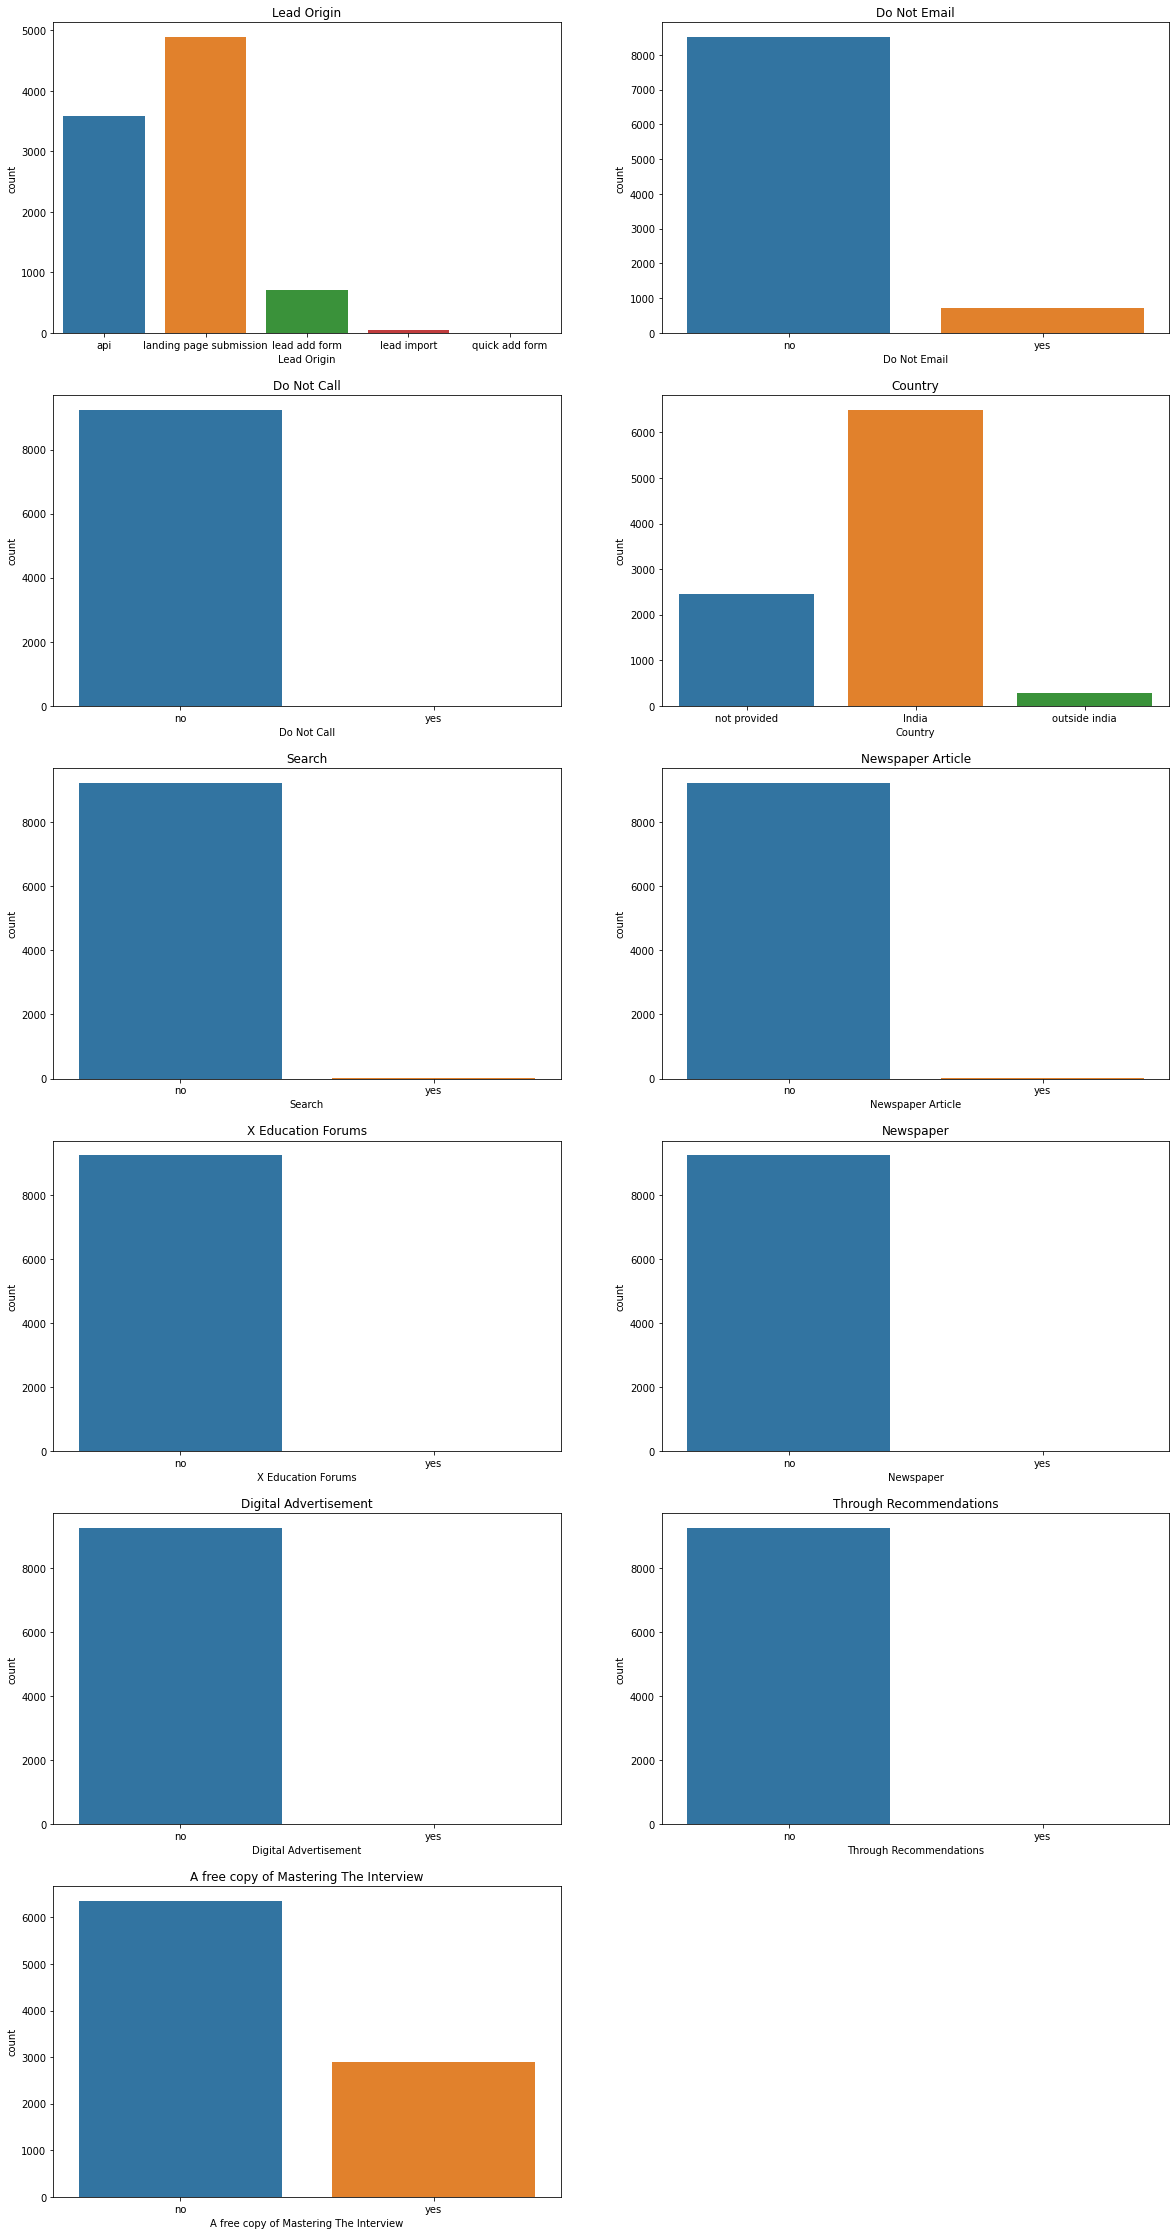

In [19]:
## Univariate Analysis for Categorical Variables- Before Dropping the variables

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

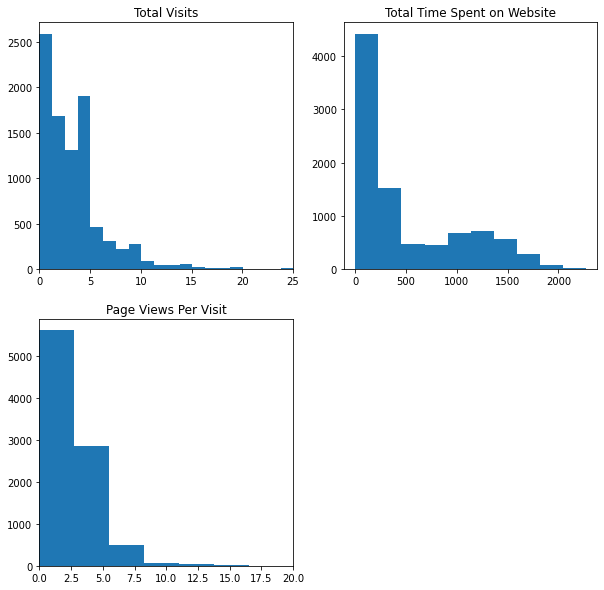

In [20]:
## Univariate Analysis for Numerical Variables

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

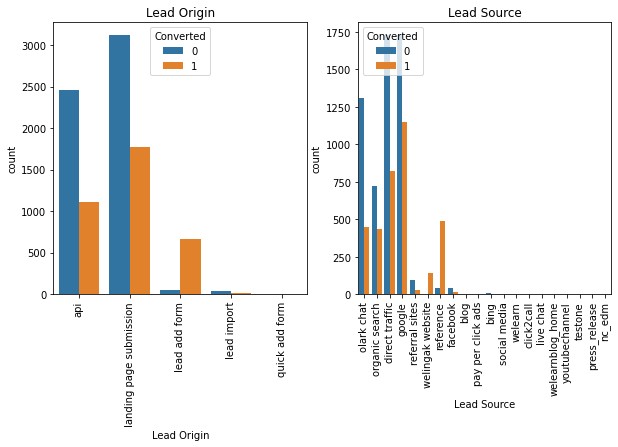

In [21]:
# Relating all the categorical variables with Target Variable(Converted)

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

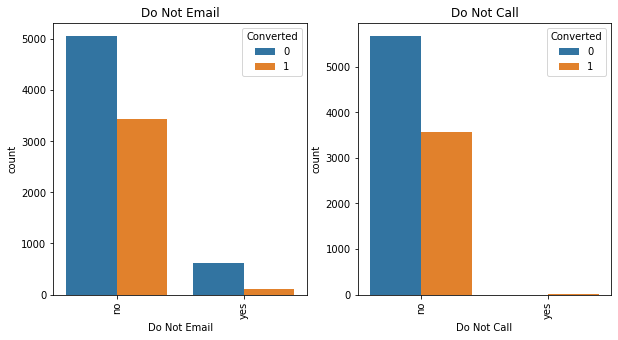

In [22]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'What matters most to you in choosing a course')

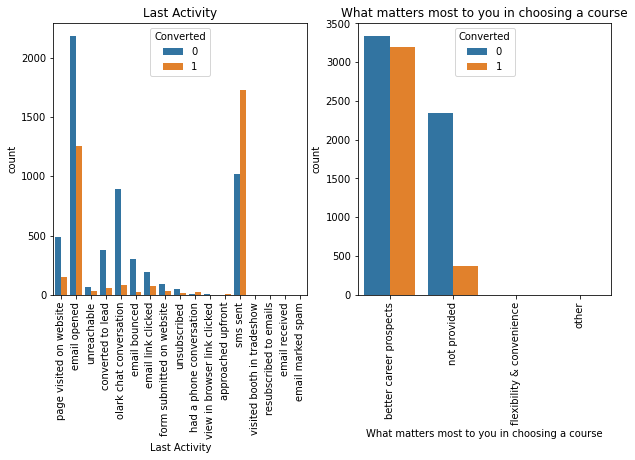

In [23]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

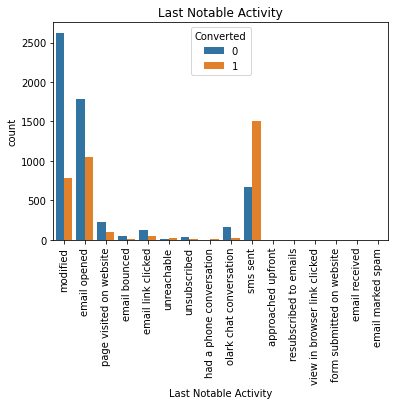

In [24]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

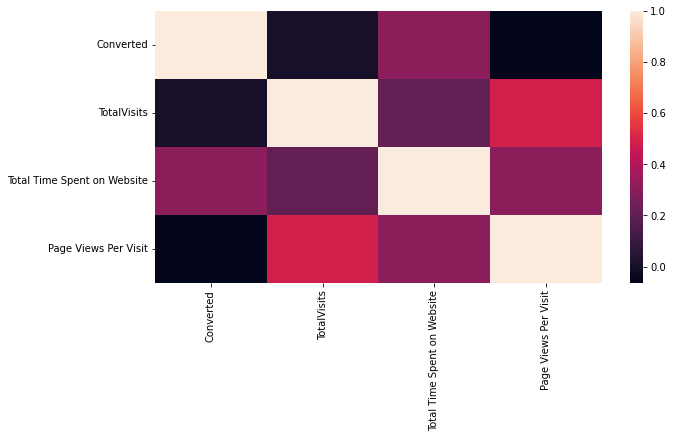

In [21]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [29]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
# Creating dummy variables for categorical variables

dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

## Add the results to the master dataframe

df = pd.concat([df, dummy], axis=1)
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,...,0,0,0,1,0,0,0,0,0,0
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Creating seperate dummies for specilization cause it has select in and its of no use,thus we will drop it
dummy = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy2 = dummy.drop(['Specialization_Select'], axis =1)

# Adding the dummy2 into master dataframe
df = pd.concat([df, dummy2], axis = 1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Dropping the feature for which dummies is created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Modelling Phase and Train Test Split

In [33]:
X = df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Putting the target variable in y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
# Split the dataset into 80% and 20% for train and test respectively

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.80, test_size=0.20,random_state=100)

In [36]:
# Scale the three numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4719,0.019920,0.632042,0.15625,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4453,0.007968,0.693222,0.12500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5770,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1774,0.011952,0.556338,0.18750,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0.007968,0.558099,0.12500,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
## Model Building

logreg = LogisticRegression()

In [38]:
# Running RFE with 15 variables as output

n_features_to_select = 15
rfe = RFE(logreg,n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [39]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 53),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 39),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [40]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [41]:
# Selecting columns selected by RFE
X_train = X_train[col]

### Model 1

In [42]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5082
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.1
Date:                Sat, 12 Nov 2022   Deviance:                       4732.3
Time:                        20:19:12   Pearson chi2:                 5.39e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0154      0.597     -1.701      0.089      -2.186       0.155
TotalVisits                                             11.3363      2.542      4.459      0.000       6.353      16.319
Total Time Spent on Website                              4.5056      0.175     25.763      0.000       4.163       4.848
Lead Origin_Lead Add Form                                2.9789      1.195      2.493      0.013       0.637       5.321
Lead Source_Olark Chat                                   1.4956      0.114     13.080      0.000       1.271       1.720
Lead Source_Reference                                    1.1714      1.213      0.966      0.334      -1.206       3.549
Lead Source_Welingak Website                             3.4748      1.561      2.226      0.026       0.416       6.534
Do Not Email_Yes                                        -1.4063      0.179     -7.871      0.000      -1.757      -1.056
Last Activity_Had a Phone Conversation                   1.1259      0.966      1.166      0.244      -0.767       3.019
Last Activity_SMS Sent                                   1.2524      0.077     16.216      0.000       1.101       1.404
What is your current occupation_Housewife               22.6486   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1732      0.623     -1.884      0.060      -2.393       0.047
What is your current occupation_Unemployed              -1.3853      0.592     -2.340      0.019      -2.546      -0.225
What is your current occupation_Working Professional     1.1880      0.616      1.928      0.054      -0.020       2.396
Last Notable Activity_Had a Phone Conversation          22.9705   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Last Notable Activity_Unreachable                        2.9393      0.797      3.690      0.000       1.378       4.501
========================================================================================================================
"""

In [43]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,93.58
4,Lead Source_Reference,72.98
5,Lead Source_Welingak Website,21.62
11,What is your current occupation_Unemployed,3.72
7,Last Activity_Had a Phone Conversation,2.51
13,Last Notable Activity_Had a Phone Conversation,2.50
1,Total Time Spent on Website,2.40
0,TotalVisits,1.66
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.58


In [44]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

### Model 2

In [45]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5083
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2369.9
Date:                Sat, 12 Nov 2022   Deviance:                       4739.7
Time:                        20:19:57   Pearson chi2:                 5.39e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3656
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0005      0.597     -1.677      0.094      -2.170       0.169
TotalVisits                                             11.0692      2.524      4.386      0.000       6.123      16.015
Total Time Spent on Website                              4.4859      0.174     25.724      0.000       4.144       4.828
Lead Source_Olark Chat                                   1.4821      0.114     13.007      0.000       1.259       1.705
Lead Source_Reference                                    4.1358      0.237     17.447      0.000       3.671       4.600
Lead Source_Welingak Website                             6.4389      1.010      6.372      0.000       4.458       8.419
Do Not Email_Yes                                        -1.4085      0.178     -7.892      0.000      -1.758      -1.059
Last Activity_Had a Phone Conversation                   1.1233      0.965      1.164      0.244      -0.768       3.014
Last Activity_SMS Sent                                   1.2533      0.077     16.240      0.000       1.102       1.405
What is your current occupation_Housewife               22.6415   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1762      0.622     -1.891      0.059      -2.396       0.043
What is your current occupation_Unemployed              -1.3853      0.592     -2.342      0.019      -2.545      -0.226
What is your current occupation_Working Professional     1.1833      0.616      1.922      0.055      -0.024       2.390
Last Notable Activity_Had a Phone Conversation          22.9696   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Last Notable Activity_Unreachable                        2.9328      0.796      3.683      0.000       1.372       4.494
========================================================================================================================
"""

In [46]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.72
6,Last Activity_Had a Phone Conversation,2.51
12,Last Notable Activity_Had a Phone Conversation,2.50
1,Total Time Spent on Website,2.40
0,TotalVisits,1.66
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.58
2,Lead Source_Olark Chat,1.45
3,Lead Source_Reference,1.32
9,What is your current occupation_Student,1.10


In [47]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [48]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5084
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.8
Date:                Sat, 12 Nov 2022   Deviance:                       4745.6
Time:                        20:20:36   Pearson chi2:                 5.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0015      0.596     -1.679      0.093      -2.170       0.167
TotalVisits                                             11.1614      2.526      4.419      0.000       6.211      16.112
Total Time Spent on Website                              4.4799      0.174     25.705      0.000       4.138       4.822
Lead Source_Olark Chat                                   1.4819      0.114     13.005      0.000       1.259       1.705
Lead Source_Reference                                    4.1334      0.237     17.434      0.000       3.669       4.598
Lead Source_Welingak Website                             6.4387      1.010      6.372      0.000       4.458       8.419
Do Not Email_Yes                                        -1.4086      0.178     -7.894      0.000      -1.758      -1.059
Last Activity_Had a Phone Conversation                   2.8541      0.794      3.596      0.000       1.299       4.410
Last Activity_SMS Sent                                   1.2531      0.077     16.242      0.000       1.102       1.404
What is your current occupation_Housewife               21.6429   1.49e+04      0.001      0.999   -2.91e+04    2.92e+04
What is your current occupation_Student                 -1.1748      0.622     -1.889      0.059      -2.394       0.044
What is your current occupation_Unemployed              -1.3839      0.591     -2.340      0.019      -2.543      -0.225
What is your current occupation_Working Professional     1.1830      0.616      1.922      0.055      -0.024       2.389
Last Notable Activity_Unreachable                        2.9318      0.796      3.681      0.000       1.371       4.493
========================================================================================================================
"""

In [49]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.72
1,Total Time Spent on Website,2.40
0,TotalVisits,1.66
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.58
2,Lead Source_Olark Chat,1.45
3,Lead Source_Reference,1.32
9,What is your current occupation_Student,1.10
5,Do Not Email_Yes,1.09
4,Lead Source_Welingak Website,1.08


In [50]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [51]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5085
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2375.0
Date:                Sat, 12 Nov 2022   Deviance:                       4750.0
Time:                        20:21:34   Pearson chi2:                 5.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4540      0.552     -0.822      0.411      -1.537       0.629
TotalVisits                                             10.9852      2.515      4.368      0.000       6.056      15.914
Total Time Spent on Website                              4.4780      0.174     25.702      0.000       4.136       4.819
Lead Source_Olark Chat                                   1.4774      0.114     12.978      0.000       1.254       1.700
Lead Source_Reference                                    4.1311      0.237     17.432      0.000       3.667       4.596
Lead Source_Welingak Website                             6.4349      1.010      6.368      0.000       4.455       8.415
Do Not Email_Yes                                        -1.4106      0.179     -7.898      0.000      -1.761      -1.061
Last Activity_Had a Phone Conversation                   2.8551      0.794      3.597      0.000       1.300       4.411
Last Activity_SMS Sent                                   1.2528      0.077     16.240      0.000       1.102       1.404
What is your current occupation_Student                 -1.7183      0.582     -2.955      0.003      -2.858      -0.579
What is your current occupation_Unemployed              -1.9272      0.549     -3.512      0.000      -3.003      -0.852
What is your current occupation_Working Professional     0.6393      0.575      1.113      0.266      -0.487       1.766
Last Notable Activity_Unreachable                        2.9297      0.797      3.678      0.000       1.368       4.491
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.71
1,Total Time Spent on Website,2.39
0,TotalVisits,1.66
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.57
2,Lead Source_Olark Chat,1.45
3,Lead Source_Reference,1.31
8,What is your current occupation_Student,1.10
5,Do Not Email_Yes,1.09
4,Lead Source_Welingak Website,1.08


In [53]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 5

In [54]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2375.6
Date:                Sat, 12 Nov 2022   Deviance:                       4751.2
Time:                        20:22:33   Pearson chi2:                 5.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1338      0.181      0.740      0.459      -0.221       0.488
TotalVisits                                   10.8925      2.510      4.340      0.000       5.974      15.811
Total Time Spent on Website                    4.4787      0.174     25.702      0.000       4.137       4.820
Lead Source_Olark Chat                         1.4770      0.114     12.980      0.000       1.254       1.700
Lead Source_Reference                          4.1306      0.237     17.433      0.000       3.666       4.595
Lead Source_Welingak Website                   6.4334      1.010      6.367      0.000       4.453       8.414
Do Not Email_Yes                              -1.4090      0.179     -7.891      0.000      -1.759      -1.059
Last Activity_Had a Phone Conversation         2.8580      0.794      3.602      0.000       1.303       4.413
Last Activity_SMS Sent                         1.2553      0.077     16.288      0.000       1.104       1.406
What is your current occupation_Student       -2.3055      0.258     -8.923      0.000      -2.812      -1.799
What is your current occupation_Unemployed    -2.5147      0.171    -14.668      0.000      -2.851      -2.179
Last Notable Activity_Unreachable              2.9308      0.797      3.679      0.000       1.370       4.492
==============================================================================================================
"""

In [55]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.85
1,Total Time Spent on Website,2.00
0,TotalVisits,1.58
7,Last Activity_SMS Sent,1.51
2,Lead Source_Olark Chat,1.34
3,Lead Source_Reference,1.12
5,Do Not Email_Yes,1.08
4,Lead Source_Welingak Website,1.07
8,What is your current occupation_Student,1.07
6,Last Activity_Had a Phone Conversation,1.01


### Model Evaluation

In [56]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4719    0.660789
4453    0.887543
5770    0.288252
1774    0.940232
403     0.551184
5171    0.111337
6263    0.150800
1475    0.933962
7133    0.288252
1662    0.193047
dtype: float64

In [57]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66078922, 0.88754273, 0.28825241, 0.94023222, 0.5511838 ,
       0.11133654, 0.15080037, 0.93396246, 0.28825241, 0.19304695])

In [58]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.660789
1,1,0.887543
2,0,0.288252
3,1,0.940232
4,0,0.551184


In [59]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.660789,1
1,1,0.887543,1
2,0,0.288252,0
3,1,0.940232,1
4,0,0.551184,1


In [60]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2207,  442],
       [ 639, 1810]], dtype=int64)

In [61]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7879560612004708

In [62]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [63]:
# Calculating the sensitivity
TP/(TP+FN)

0.7390771743568804

In [64]:
# Calculating the specificity
TN/(TN+FP)

0.8331445828614572

### Selecting Optimized Cutoff

In [65]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

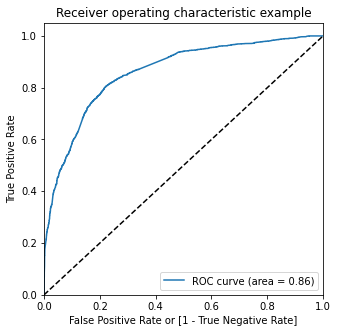

In [67]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [68]:
# Let's make columns with various cutoffs for likelihood.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.660789,1,1,1,1,1,1,1,1,0,0,0
1,1,0.887543,1,1,1,1,1,1,1,1,1,1,0
2,0,0.288252,0,1,1,1,0,0,0,0,0,0,0
3,1,0.940232,1,1,1,1,1,1,1,1,1,1,1
4,0,0.551184,1,1,1,1,1,1,1,0,0,0,0


In [69]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.480384,1.000000,0.000000
0.1,0.1,0.528835,0.991833,0.100793
0.2,0.2,0.699490,0.944467,0.473009
0.3,0.3,0.766575,0.865659,0.674972
0.4,0.4,0.789918,0.809718,0.771612
0.5,0.5,0.787956,0.739077,0.833145
0.6,0.6,0.756767,0.619845,0.883352
0.7,0.7,0.735779,0.545120,0.912042
0.8,0.8,0.711848,0.452838,0.951302
0.9,0.9,0.645155,0.280523,0.982257


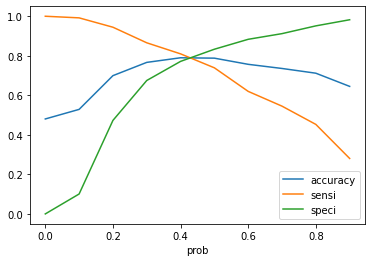

In [70]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [71]:
# Checking with 0.42 as threshold

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.660789,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.887543,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.288252,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.940232,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.551184,1,1,1,1,1,1,1,0,0,0,0,1


In [72]:
# Checking Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901137701059239

In [73]:
# Building the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2086,  563],
       [ 507, 1942]], dtype=int64)

In [74]:
# Let's assess the additional metrics.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
# Sensitivity
TP/float(TP+FN)

0.7929767251939567

In [76]:
# Specificity
TN/float(TN+FP)

0.7874669686674217

### Precision-Recall

In [77]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2207,  442],
       [ 639, 1810]], dtype=int64)

In [78]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8037300177619894

In [79]:
# Recall
confusion[1,1]/(confusion[1,1]+ confusion[1,0])

0.7390771743568804

### Precision Recall Tradeoff

In [80]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 5093    1
 5094    0
 5095    0
 5096    0
 5097    0
 Name: Converted, Length: 5098, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 5093    1
 5094    1
 5095    1
 5096    0
 5097    0
 Name: Predicted, Length: 5098, dtype: int64)

In [83]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

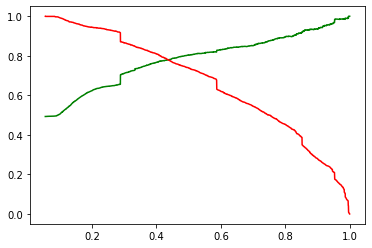

In [84]:
# plotting graph for precsion and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:
# Adding 'final_predicted' column in df with 0.44 cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.660789,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.887543,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.288252,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.940232,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.551184,1,1,1,1,1,1,1,0,0,0,0,1


In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2207,  442],
       [ 639, 1810]], dtype=int64)

In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7879560612004708

In [88]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [89]:
# Sensitivity
TP/float(TP+FN)

0.7390771743568804

In [90]:
# Specificity
TN/float(TN+FP)

0.8331445828614572

### Checking for results in Test Set

In [92]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
# Substituting all the columns in the final train model
X_col = X_train.columns

In [94]:
# Select the columns in X_train for X_test as well
X_test = X_test[X_col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[X_col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4818,1.0,0.011952,0.002201,0,0,0,0,0,0,0,1,0
8885,1.0,0.015936,0.589789,0,0,0,0,0,0,0,1,0
4786,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0
6702,1.0,0.103586,0.509243,0,0,0,0,0,0,0,1,0


In [96]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996009
1,0,0.124881
2,0,0.713968
3,1,0.330221
4,1,0.729429


In [97]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.996009,1
1,0,0.124881,0
2,0,0.713968,1
3,1,0.330221,0
4,1,0.729429,1
...,...,...,...
1270,0,0.096143,0
1271,1,0.606871,1
1272,1,0.996009,1
1273,1,0.736559,1


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7764705882352941

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[517, 142],
       [143, 473]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.7678571428571429

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.7845220030349014

In [103]:
# Precision
TP/(TP+FP)

0.7691056910569106

In [104]:
# Recall
TP/(TP+FN)

0.7678571428571429